In [56]:
#This exploratory data analysis gives insights from Facebook dataset which consists of identifying users 
#that can be focused more to increase the business.
#These valuable insights should help Facebook to take intelligent decision to identify 
#its useful users and provide correct recommendations to them.

In [57]:
#Facebook, Inc., is an American multinational conglomerate based in Menlo Park, California. It was founded by Mark Zuckerberg, along with his fellow roommates and students at Harvard College, who were Eduardo Saverin, Andrew McCollum, Dustin Moskovitz and 
#Chris Hughes, originally as TheFacebook.comâ€”today's Facebook, a popular global social networking service. 
#It is one of the world's most valuable companies. 
#It is considered one of the Big Five companies in U.S. information technology, with Google, Apple, Microsoft and Amazon.

#Facebook offers other products and services beyond its social networking platform, including Facebook Messenger, 
#Facebook Watch, and Facebook Portal. It also has acquired Instagram, WhatsApp, Oculus, Giphy and Mapillary, 
#and has a 9.9% stake in Jio Platforms.[

In [52]:
import pandas as pd #Library to handle with dataframes
import matplotlib.pyplot as plt # Library to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats

In [53]:
facebook=pd.read_csv('pseudo_facebook.csv')

In [54]:
facebook.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0  
3                      0          0                   0  
4                      0          0                   0

In [55]:
facebook.tail()

userid  age  dob_day  dob_year  dob_month  gender  tenure  \
98998  1268299   68        4      1945          4  female   541.0   
98999  1256153   18       12      1995          3  female    21.0   
99000  1195943   15       10      1998          5  female   111.0   
99001  1468023   23       11      1990          4  female   416.0   
99002  1397896   39       15      1974          5  female   397.0   

       friend_count  friendships_initiated  likes  likes_received  \
98998          2118                    341   3996           18089   
98999          1968                   1720   4401           13412   
99000          2002                   1524  11959           12554   
99001          2560                    185   4506            6516   
99002          2049                    768   9410           12443   

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  
98998          3505                  11887        491                6202  
98999          4399                  10592          2                2820  
99000         11959                  11462          0                1092  
99001          4506                   5760          0                 756  
99002          9410                   9530          0                2913

In [58]:
# checking for null values
facebook.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [59]:
facebook.dropna(inplace=True)

In [60]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes:

In [61]:
facebook['dob_month_name']=facebook['dob_month']

In [62]:
facebook.dob_month_name = facebook.dob_month_name.astype(str)

In [63]:
facebook.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received dob_month_name  
0                      0          0                   0             11  
1                      0          0                   0             11  
2                      0          0                   0             11  
3                      0          0                   0             12  
4                      0          0                   0             12

In [64]:
# giving names to month number
month_name={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}
facebook['dob_month_name']=facebook['dob_month_name'].map(month_name)

In [65]:
facebook.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received dob_month_name  
0                      0          0                   0       November  
1                      0          0                   0       November  
2                      0          0                   0       November  
3                      0          0                   0       December  
4                      0          0                   0       December

In [66]:
# coverting float to int
facebook['tenure'] = facebook['tenure'].apply(np.int64)

In [67]:
facebook.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male     266             0   
1  1192601   14        2      1999         11  female       6             0   
2  2083884   14       16      1999         11    male      13             0   
3  1203168   14       25      1999         12  female      93             0   
4  1733186   14        4      1999         12    male      82             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received dob_month_name  
0                      0          0                   0       November  
1                      0          0                   0       November  
2                      0          0                   0       November  
3                      0          0                   0       December  
4                      0          0                   0       December

In [68]:
# checking for duplicates
duplicate = facebook[facebook.duplicated()]
duplicate

Empty DataFrame
Columns: [userid, age, dob_day, dob_year, dob_month, gender, tenure, friend_count, friendships_initiated, likes, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received, dob_month_name]
Index: []

In [69]:
# making a new column for age group
age_grp=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook['age_group'] = pd.cut(facebook.age,bins=np.arange(10,121,10),labels=age_grp,right=True)

In [70]:
facebook.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male     266             0   
1  1192601   14        2      1999         11  female       6             0   
2  2083884   14       16      1999         11    male      13             0   
3  1203168   14       25      1999         12  female      93             0   
4  1733186   14        4      1999         12    male      82             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received dob_month_name  \
0                      0          0                   0       November   
1                      0          0                   0       November   
2                      0          0                   0       November   
3                      0          0                   0       December   
4                      0          0                   0       December   

  age_group  
0     10-20  
1     10-20  
2     10-20  
3     10-20  
4     10-20

In [71]:
#maximum age of a person on facebook

In [72]:
facebook['age'].max()

113

In [73]:
df=facebook['age_group'].value_counts().reset_index().rename(columns={'age_group':'count','index':'age_group'})
df.sort_values('age_group',ascending=True,inplace=True)
df.head()

age_group  count
1     10-20  24747
0     21-30  28634
2     31-40  12487
4     41-50   8962
3     51-60   9288

In [74]:
df1=facebook[(facebook['age']>=21)&(facebook['age']<=30)]
df1.head()

userid  age  dob_day  dob_year  dob_month gender  tenure  friend_count  \
302  1724334   21       21      1992         11   male     251             0   
303  1439541   21        4      1992         11   male      16             0   
304  1787342   21       29      1992         12   male    1244             0   
305  1592756   21       25      1992         12   male     669             0   
306  2160210   21       31      1992         12   male      11             0   

     friendships_initiated  likes  likes_received  mobile_likes  \
302                      0      0               0             0   
303                      0      0               0             0   
304                      0      0               0             0   
305                      0      0               0             0   
306                      0      0               0             0   

     mobile_likes_received  www_likes  www_likes_received dob_month_name  \
302                      0          0                   0       November   
303                      0          0                   0       November   
304                      0          0                   0       December   
305                      0          0                   0       December   
306                      0          0                   0       December   

    age_group  
302     21-30  
303     21-30  
304     21-30  
305     21-30  
306     21-30

In [75]:
df2=df1['age'].value_counts().reset_index().rename(columns={'age':'count','index':'age'})
df2.sort_values('age',ascending=True,inplace=True)
df2.head()

age  count
1   21   3670
3   22   3032
0   23   4402
4   24   2827
2   25   3636

In [76]:
df3=facebook[facebook['age']==23]
df3.head()

userid  age  dob_day  dob_year  dob_month gender  tenure  friend_count  \
394  1985700   23        4      1990         11   male     605             0   
395  1293422   23        7      1990         11   male     462             0   
396  1287930   23       13      1990         11   male     207             0   
397  1398096   23       11      1990         11   male     151             0   
398  1341689   23       19      1990         12   male     882             0   

     friendships_initiated  likes  likes_received  mobile_likes  \
394                      0      0               0             0   
395                      0      0               0             0   
396                      0      0               0             0   
397                      0      0               0             0   
398                      0      0               0             0   

     mobile_likes_received  www_likes  www_likes_received dob_month_name  \
394                      0          0                   0       November   
395                      0          0                   0       November   
396                      0          0                   0       November   
397                      0          0                   0       November   
398                      0          0                   0       December   

    age_group  
394     21-30  
395     21-30  
396     21-30  
397     21-30  
398     21-30

In [77]:
df4=df3['gender'].value_counts().reset_index().rename(columns={'gender':'count','index':'gender'})
df4.sort_values('gender',ascending=True,inplace=True)
df4

gender  count
1  female   1438
0    male   2964

In [78]:
facebook['likes'].sum()

15427901

In [79]:
facebook['friend_count'].sum()

19406860

In [80]:
df5=facebook.groupby('gender').sum()
df5

userid      age  dob_day   dob_year  dob_month    tenure  \
gender                                                                  
female  64311885168  1588228   605311   79439048     259055  23637151   
male    93520103528  2089349   830938  115820113     362042  29298972   

        friend_count  friendships_initiated     likes  likes_received  \
gender                                                                  
female       9740073                4584801  10467978        10121203   
male         9666787                6037023   4959923         3977851   

        mobile_likes  mobile_likes_received  www_likes  www_likes_received  
gender                                                                      
female       6960420                5921375    3507554             4199824  
male         3529747                2391753    1430175             1586098

In [81]:
#Exploratory Data Analysis 

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

<AxesSubplot:xlabel='age_group', ylabel='count'>

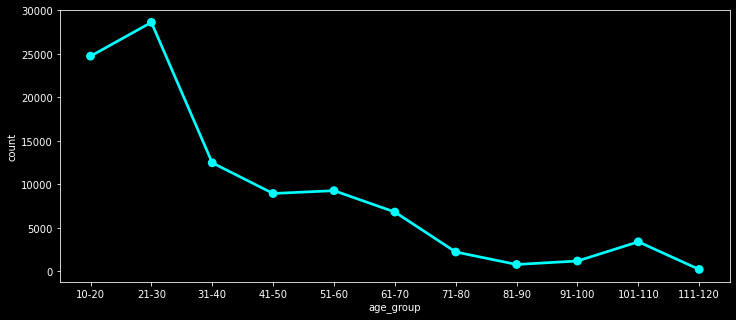

In [83]:
plt.figure(figsize=(12,5))
sns.pointplot(x='age_group',y='count',data=df,color='aqua')

In [84]:
#21-30 age group has most number of users and 10-20 age group has second highest number of users.

In [85]:
#Which age among the 21-30 age group has highest number of users?

<AxesSubplot:xlabel='age', ylabel='count'>

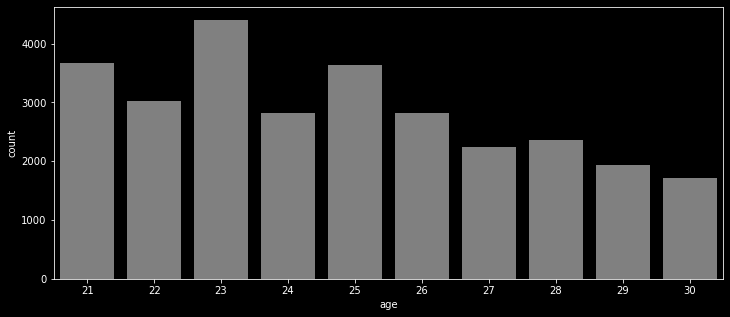

In [86]:
plt.figure(figsize=(12,5))
sns.barplot(x='age',y='count',data=df2,color='grey')

In [87]:
#This plot sows that in this age group 23 year olds are the highest number of users in this age group

In [88]:
#Which gender aged 23 has higher number of users?

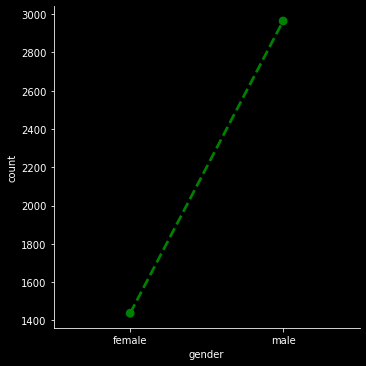

In [89]:
sns.catplot(x="gender",y="count",kind='point', data=df4,edgecolor=".6",linestyles=["--"],color='green')

In [90]:
#Men are higher in number in the 23 year old user age group

<AxesSubplot:xlabel='gender', ylabel='count'>

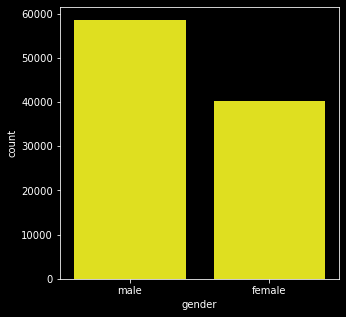

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender',data=facebook,color='yellow')

In [92]:
#There are more male users than female users on facebook in total.

In [93]:
#Which gender has most number of friends?

In [94]:
df5['friend_count']

gender
female    9740073
male      9666787
Name: friend_count, dtype: int64

In [95]:
#Females tend to have more friends than males on facebook.

In [96]:
#Which age group has highest friend count?

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

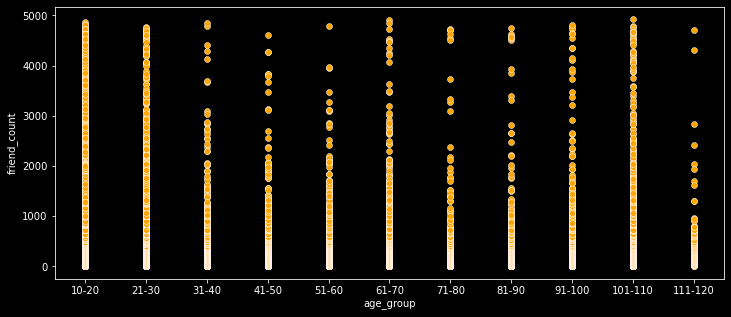

In [97]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='age_group',y='friend_count',data=facebook,color='orange')

In [98]:
#The 10-20 and 21-30 age groups seems to have the highest friend count as per the plot above.

In [99]:
#Who has the highest friend count?

In [100]:
facebook[facebook['friend_count']==facebook['friend_count'].max()][['age','gender','friend_count']]

age  gender  friend_count
98159  103  female          4923

In [102]:
#which age group receives the most likes split between gender?

<AxesSubplot:xlabel='age_group', ylabel='likes_received'>

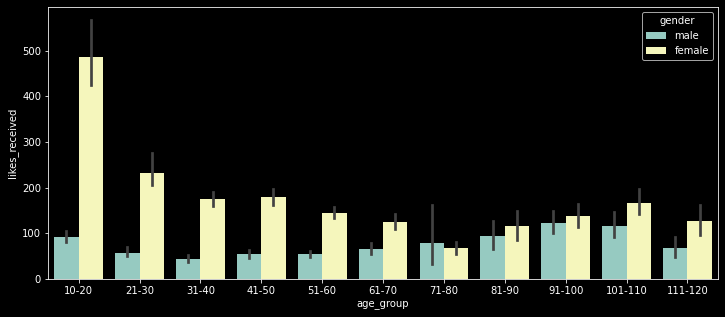

In [101]:
plt.figure(figsize=(12,5))
sns.barplot(x='age_group',y='likes_received',data=facebook,hue='gender')

In [103]:
#females in the age group 10-20 has most number of likes received

In [104]:
#Which age among the 10-20 age group has highest number of likes received?

In [105]:
df6=facebook[(facebook['age']>=10)&(facebook['age']<=20)]
df6.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male     266             0   
1  1192601   14        2      1999         11  female       6             0   
2  2083884   14       16      1999         11    male      13             0   
3  1203168   14       25      1999         12  female      93             0   
4  1733186   14        4      1999         12    male      82             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received dob_month_name  \
0                      0          0                   0       November   
1                      0          0                   0       November   
2                      0          0                   0       November   
3                      0          0                   0       December   
4                      0          0                   0       December   

  age_group  
0     10-20  
1     10-20  
2     10-20  
3     10-20  
4     10-20

<AxesSubplot:xlabel='count', ylabel='age'>

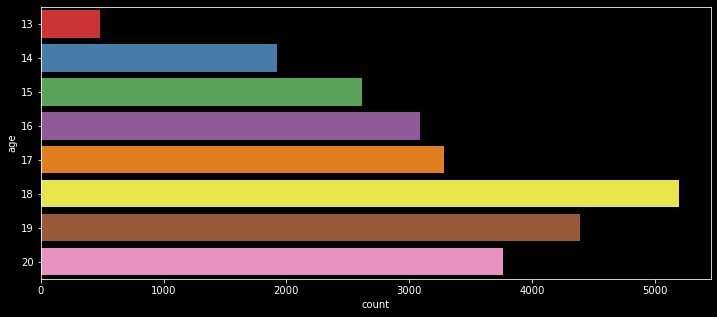

In [106]:
plt.figure(figsize=(12,5))
sns.countplot(y='age',data=df6,palette='Set1')

In [107]:
#This plot shows that age 18 has received most number of likes.

In [108]:
#Who received the most number of likes aged 18?

In [109]:
df7=facebook[facebook['age']==18]
df7.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
153  1590837   18       30      1995         11    male     587             0   
154  1124403   18       13      1995         11    male     577             0   
155  1364002   18       27      1995         11    male      80             0   
156  2113653   18        4      1995         11  female      15             0   
157  1331161   18       27      1995         12    male     715             0   

     friendships_initiated  likes  likes_received  mobile_likes  \
153                      0      0               0             0   
154                      0      0               0             0   
155                      0      0               0             0   
156                      0      0               0             0   
157                      0      0               0             0   

     mobile_likes_received  www_likes  www_likes_received dob_month_name  \
153                      0          0                   0       November   
154                      0          0                   0       November   
155                      0          0                   0       November   
156                      0          0                   0       November   
157                      0          0                   0       December   

    age_group  
153     10-20  
154     10-20  
155     10-20  
156     10-20  
157     10-20

<AxesSubplot:xlabel='gender', ylabel='likes_received'>

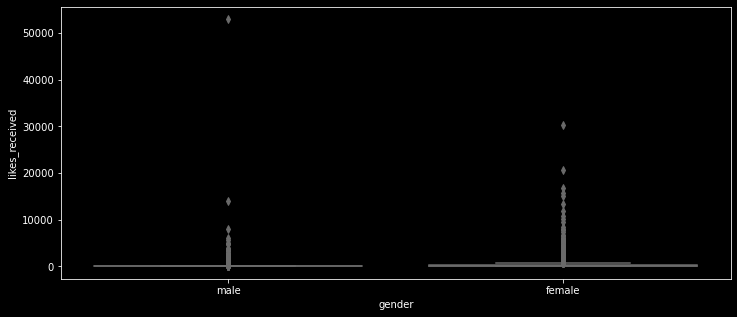

In [110]:
plt.figure(figsize=(12,5))
sns.boxplot(y='likes_received',x='gender',data=df7)

In [111]:
# Male has an outlier which shows the person has highest number of likes received

In [112]:
df8=df7[df7['likes_received']==df7['likes_received'].max()]
df8[['age','gender','friend_count','likes_received']]

age gender  friend_count  likes_received
98773   18   male          4817           52964

In [113]:
df9=facebook['dob_month_name'].value_counts().reset_index().rename(columns={'dob_month_name':'count','index':'month'})
df9

month  count
0     January  11737
1     October   8466
2         May   8260
3      August   8255
4       March   8095
5        July   8006
6   September   7923
7    December   7883
8       April   7794
9    February   7617
10       June   7594
11   November   7196

In [114]:
df9['month_no']=df9['month']
month_name={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df9['month_no']=df9['month_no'].map(month_name)
df9.sort_values('month_no',ascending='True',inplace=True)
df9.drop('month_no',axis=1,inplace=True)
df9

month  count
0     January  11737
9    February   7617
4       March   8095
8       April   7794
2         May   8260
10       June   7594
5        July   8006
3      August   8255
6   September   7923
1     October   8466
11   November   7196
7    December   7883

<AxesSubplot:xlabel='count', ylabel='month'>

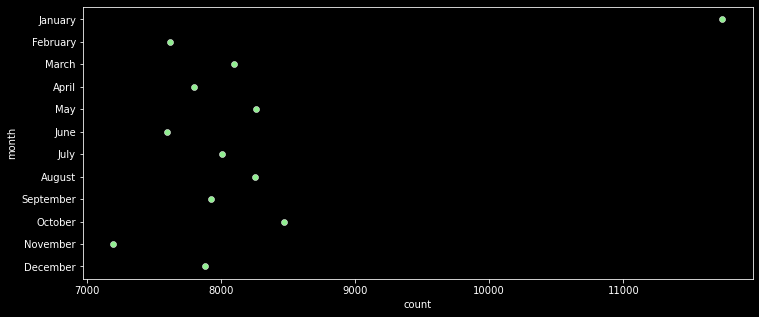

In [115]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='month',x='count',data=df9,color='lightgreen')

In [117]:
#According to the plot above most facebook users are born in the month of January

<AxesSubplot:xlabel='dob_year', ylabel='Density'>

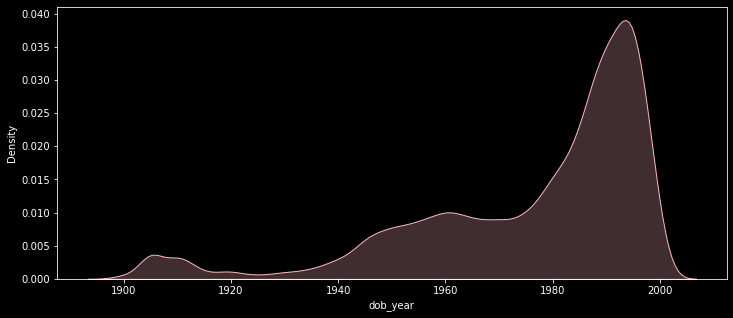

In [118]:
plt.figure(figsize=(12,5))
sns.kdeplot(facebook['dob_year'],color='lightpink',fill=True)

In [119]:
#Most of the users were born between 1980 and 2000

<AxesSubplot:xlabel='age_group', ylabel='mobile_likes_received'>

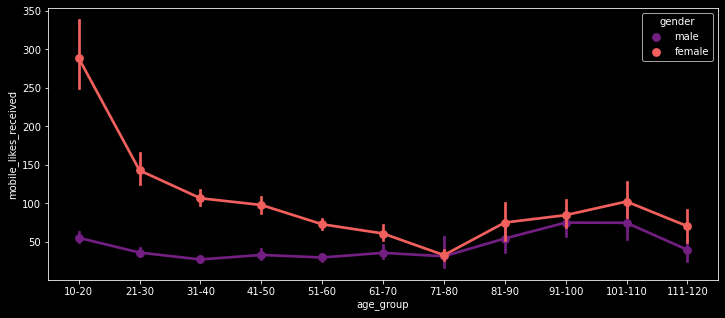

In [120]:
plt.figure(figsize=(12,5))
sns.pointplot(x='age_group',y='mobile_likes_received',data=facebook,hue='gender',palette='magma')

In [121]:
#Females in the age group 10-20 has received more number of likes through mobile.
#Younger people are on the phones a lot more and a lot longer than the other age groups for various real life reasons

<AxesSubplot:xlabel='age_group', ylabel='www_likes_received'>

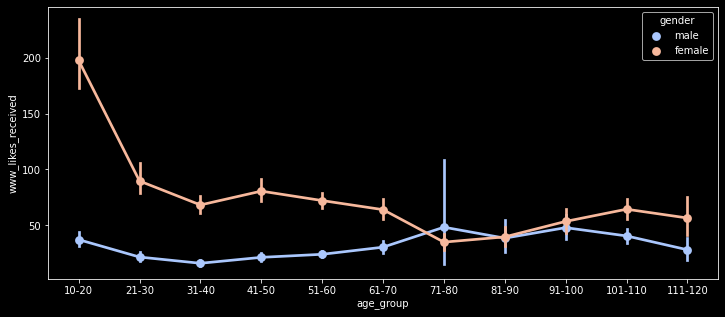

In [122]:
plt.figure(figsize=(12,5))
sns.pointplot(x='age_group',y='www_likes_received',data=facebook,hue='gender',palette='coolwarm')

In [123]:
# Females in the age group 10-20 has received more number of likes through web.

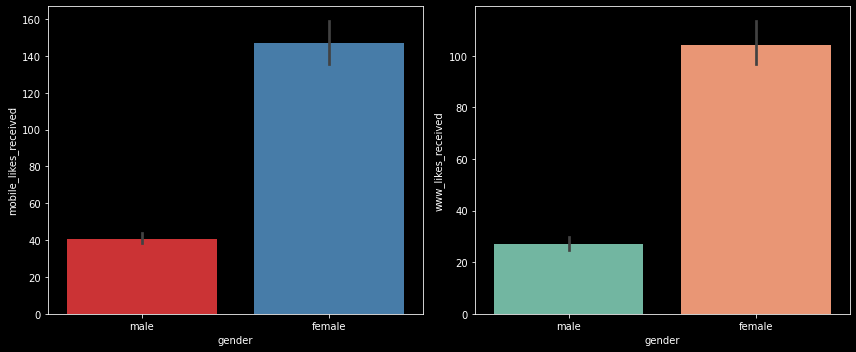

In [124]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='gender',y='mobile_likes_received',data=facebook,palette='Set1')
plt.subplot(1,2,2)
sns.barplot(x='gender',y='www_likes_received',data=facebook,palette='Set2')
plt.tight_layout()

In [125]:
#Mobile users are more than web users.

In [126]:
#Conclusion

In [127]:
#Younger people are drawn to social media platforms like facebook. The ease of access through mobile phones
#has provided the increase in numbers of younger people interacting with the platform.

#Pressure may be put on parents to purchase smart phones that allow the experience of social media on the device 
#to be much better.
#The like driven society may make other young people feel bad about themselves for not receiving as many likes.

#Provides the platform with more information on their users for marketing purposes and content access,
#as knowing the most active age groups facebook can better filter the content on the platform to better suit the age group.

In [128]:
#Report written by: Busisiwe Ngubane